<a href="https://colab.research.google.com/github/MohitTiwari-07/Contents/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Step 0: Imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load Titanic Dataset
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1. Load the Titanic Dataset


In [11]:
# Step 0: Imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load Titanic Dataset
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. Data Summary & Missing Values

In [3]:
# Overview
print(df.info())
print("\nSummary Statistics:\n", df.describe(include='all'))

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Summary Statistics:
           survived      pclass   sex         age    

In [4]:
# Impute 'age' with median
df['age'].fillna(df['age'].median(), inplace=True)

# Impute 'embarked' with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop 'deck' due to many missing values
df.drop(columns='deck', inplace=True)

# Confirm missing values
print("\nAfter Imputation:\n", df.isnull().sum())



After Imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


<ipython-input-4-2670474735>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-4-2670474735>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

3. Univariate Analysis

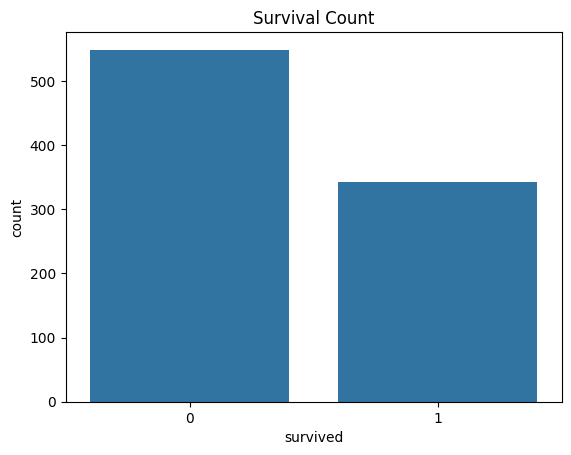

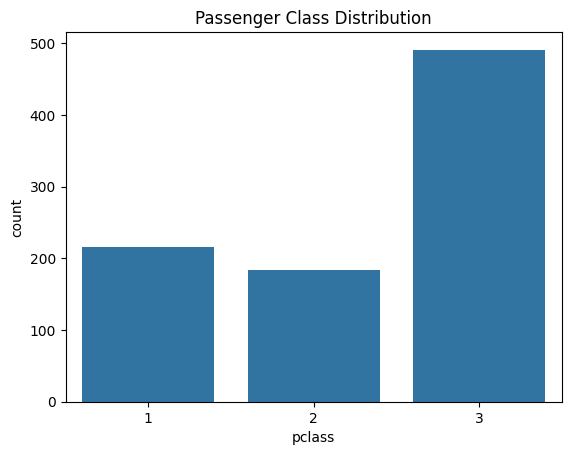

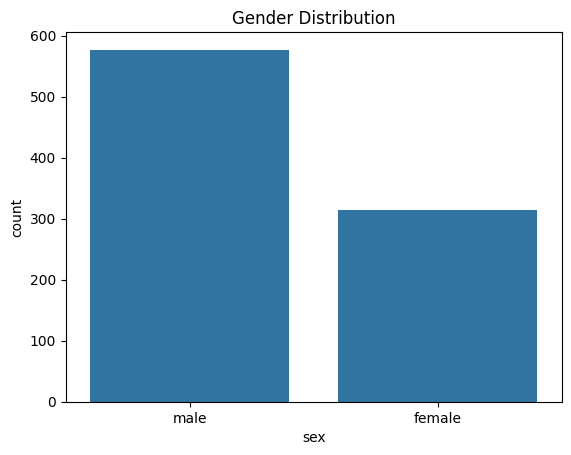

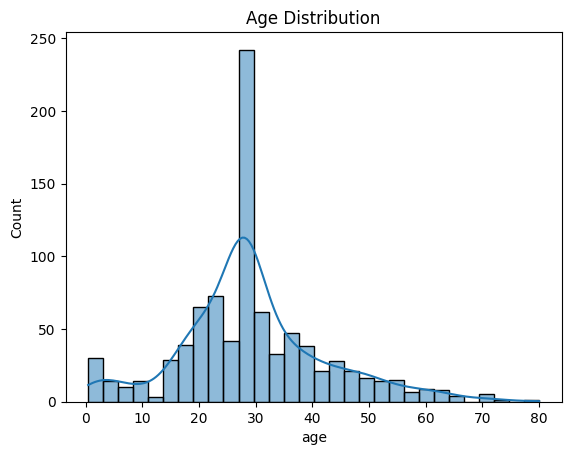

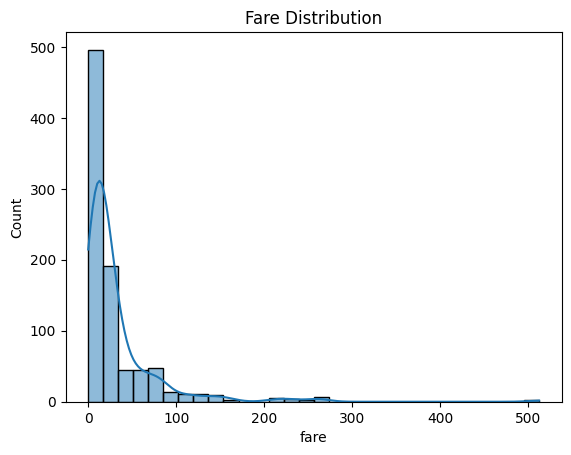

In [5]:
# Survival
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

# Passenger Class
sns.countplot(x='pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# Sex
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

# Age distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Fare distribution
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()


4. Bivariate Analysis

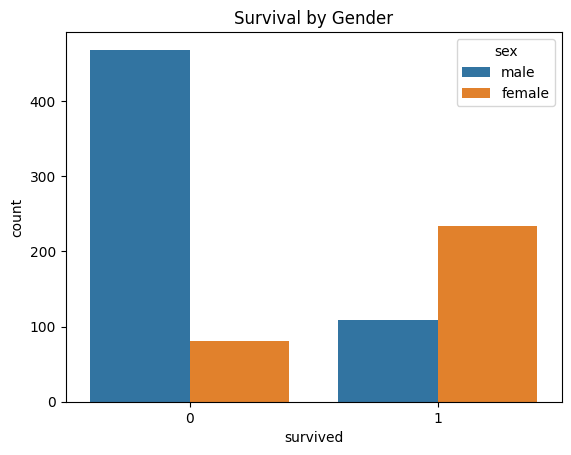

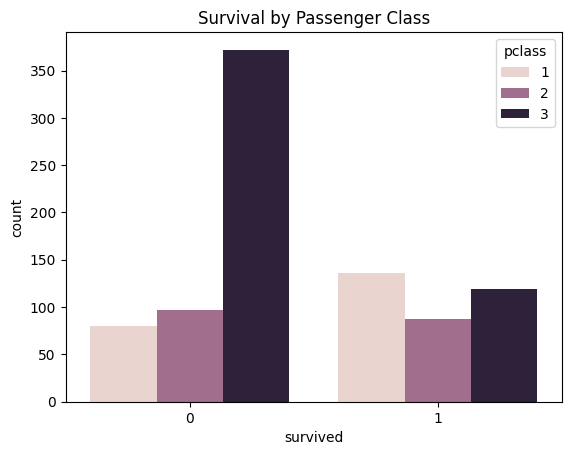

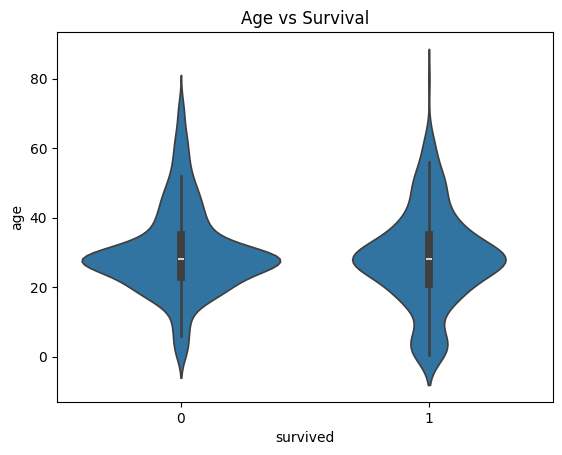

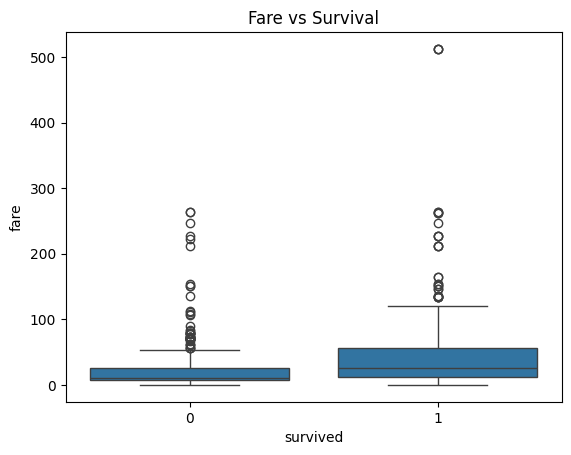

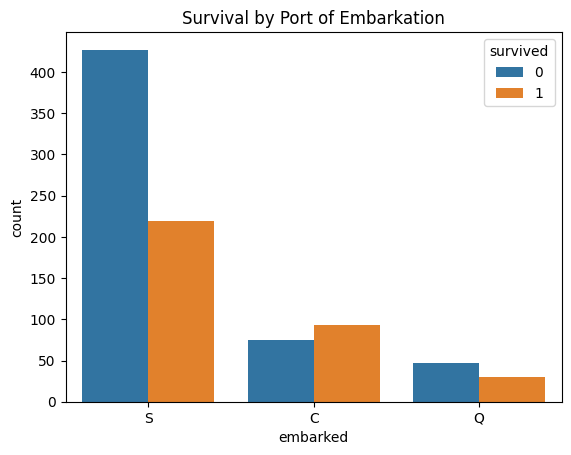

In [6]:
# Survival by Sex
sns.countplot(x='survived', hue='sex', data=df)
plt.title('Survival by Gender')
plt.show()

# Survival by Pclass
sns.countplot(x='survived', hue='pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Age vs Survived
sns.violinplot(x='survived', y='age', data=df)
plt.title('Age vs Survival')
plt.show()

# Fare vs Survived
sns.boxplot(x='survived', y='fare', data=df)
plt.title('Fare vs Survival')
plt.show()

# Embarked vs Survived
sns.countplot(x='embarked', hue='survived', data=df)
plt.title('Survival by Port of Embarkation')
plt.show()


5.Survival Analysis

In [7]:
# By gender
print("Survival Rate by Gender:")
print(df.groupby('sex')['survived'].mean())

# By class
print("\nSurvival Rate by Class:")
print(df.groupby('pclass')['survived'].mean())

# Cross tab
pd.crosstab(df['pclass'], df['survived'], margins=True, normalize='index')


Survival Rate by Gender:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Survival Rate by Class:
pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


survived,0,1
pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


6. Feature Engineering

,sex,embarked,family_size,is_alone
0,0,0,2,0
1,1,1,2,0
2,1,0,1,1
3,1,0,2,0
4,0,0,1,1


7.Advanced Visualization (Heatmap)

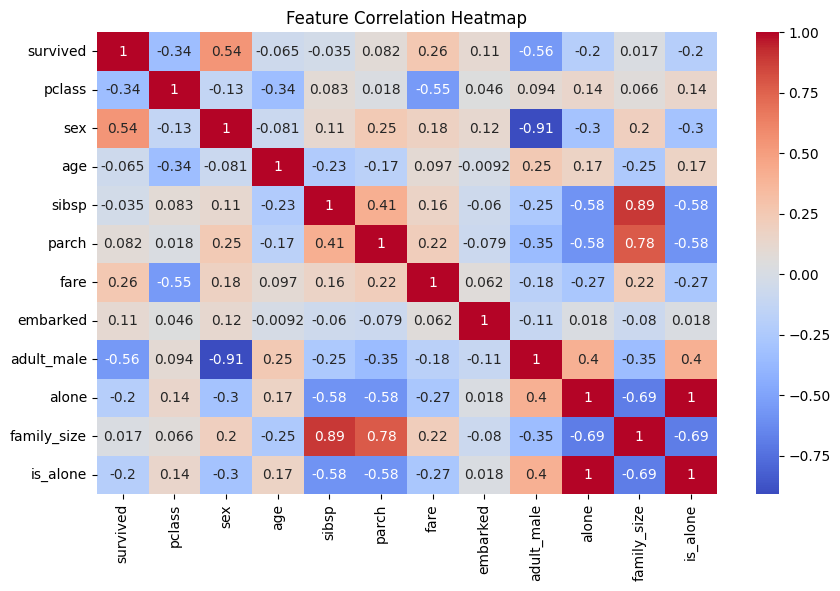

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

